***Proyecto 4***: Sistema de planificación y análisis de tendencias

***Descripción del demo:*** Prediga tendencias de ventas (o de cualquier métrica temporal) usando modelos de series temporales, como ARIMA o Prophet de Meta, sobre un dataset temporal (por ejemplo, ventas por día).

Tecnologías utilizadas

| Herramienta     | Uso principal                                  |
|-----------------|------------------------------------------------|
| Python 3        | Lenguaje principal del análisis                |
| Pandas          | Manipulación y análisis de datos               |
| Matplotlib      | Visualización básica de datos                  |
| Prophet         | Modelo de predicción de series temporales      |
| Google Colab    | Entorno de ejecución recomendado               |

# ***Demo***

📦 1. Instalación de librerías necesarias

In [1]:
!pip install pandas matplotlib prophet

📚 2. Importación de librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

📁 3. Carga del archivo CSV

In [3]:
print("🔼 Sube tu archivo CSV (de Amazon Sales)...")
uploaded = files.upload()

🔼 Sube tu archivo CSV (de Amazon Sales)...


Saving amazon.csv to amazon (1).csv


📑 4. Lectura del dataset

In [4]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

👀 5. Vista previa del dataset

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


🧹 6. Preprocesamiento de datos

<ipython-input-6-0a5db061e3f6>:23: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


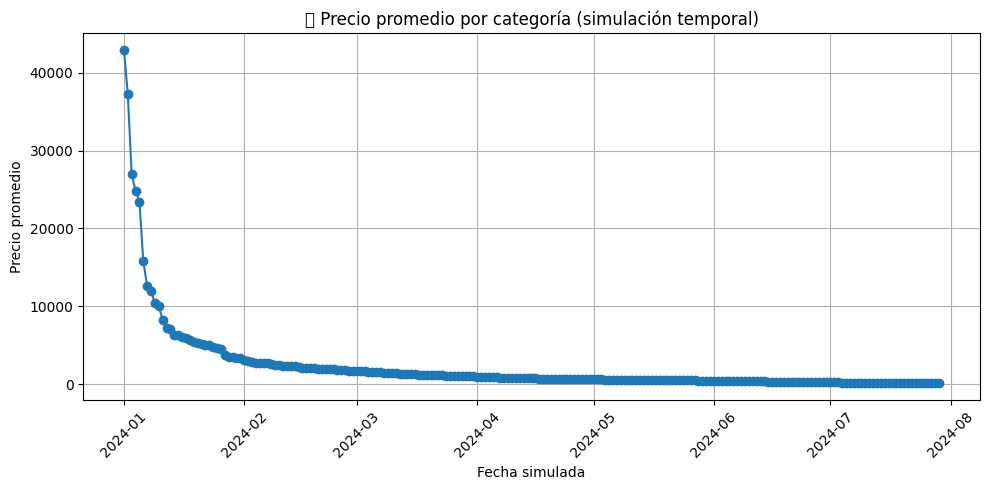

,category,y,ds
126,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",42990.000000,2024-01-01
43,Computers&Accessories|Laptops|TraditionalLaptops,37247.000000,2024-01-02
57,Computers&Accessories|Tablets,26999.000000,2024-01-03
97,"Electronics|HomeTheater,TV&Video|Televisions|S...",24840.190476,2024-01-04
188,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",23449.500000,2024-01-05


In [6]:
# Eliminar filas con valores faltantes en columnas clave
df_clean = df[['category', 'discounted_price']].dropna()

# Limpiar el precio: eliminar símbolo ₹ y comas, luego convertir a float
df_clean['discounted_price'] = df_clean['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# Agrupar por categoría y obtener el precio promedio
grouped = df_clean.groupby('category')['discounted_price'].mean().reset_index()
grouped = grouped.sort_values(by='discounted_price', ascending=False)

# Simulamos una serie temporal artificial (día por categoría)
grouped['ds'] = pd.date_range(start='2024-01-01', periods=len(grouped), freq='D')
grouped.rename(columns={'discounted_price': 'y'}, inplace=True)

# Visualizamos la serie simulada
plt.figure(figsize=(10,5))
plt.plot(grouped['ds'], grouped['y'], marker='o')
plt.title('💲 Precio promedio por categoría (simulación temporal)')
plt.xlabel('Fecha simulada')
plt.ylabel('Precio promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped.head()

🔮 7. Modelo de predicción con Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2clud8as/50k28js_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2clud8as/dkgn685z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49235', 'data', 'file=/tmp/tmp2clud8as/50k28js_.json', 'init=/tmp/tmp2clud8as/dkgn685z.json', 'output', 'file=/tmp/tmp2clud8as/prophet_modelvizeqllm/prophet_model-20250422163120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

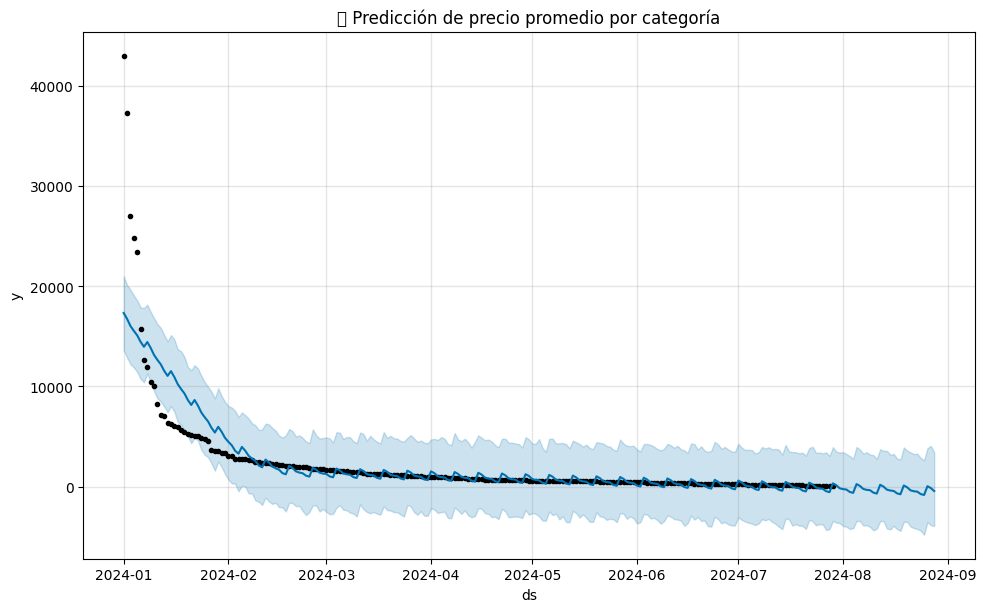

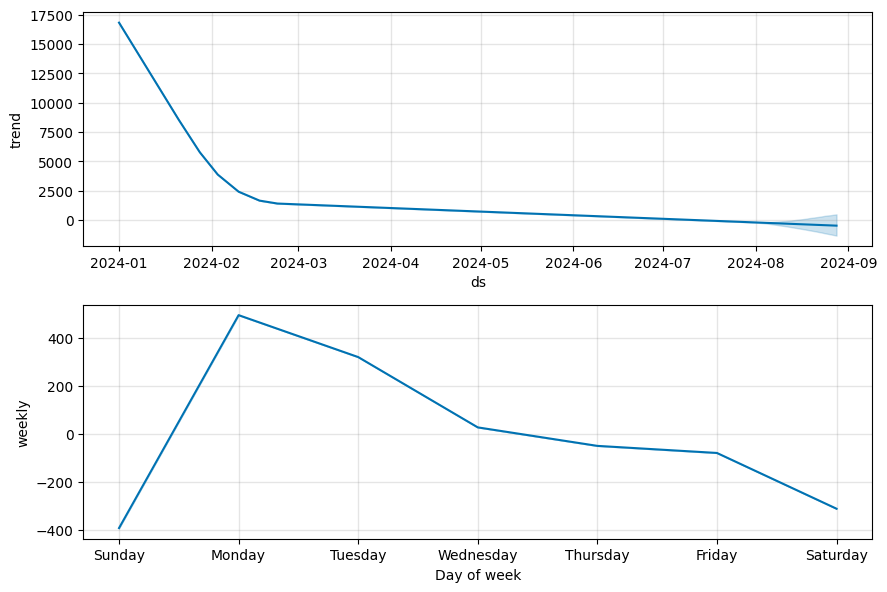

In [7]:
model = Prophet()
model.fit(grouped[['ds', 'y']])

# Hacer predicciones para los próximos 30 "días"
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Mostrar gráfica de predicción
fig1 = model.plot(forecast)
plt.title("🔮 Predicción de precio promedio por categoría")
plt.show()

# Opcional: Componentes de tendencia
fig2 = model.plot_components(forecast)
plt.show()

📌 8. Conclusión automática

In [8]:
from datetime import datetime

last_date = grouped['ds'].max().strftime('%Y-%m-%d')
predicted_mean = round(forecast.iloc[-30:]['yhat'].mean(), 2)
original_mean = round(grouped['y'].mean(), 2)

print(f"""
📊 RESULTADOS:

🔹 Fecha simulada más reciente: {last_date}
🔹 Precio promedio original por categoría: ${original_mean}
🔹 Precio promedio estimado para próximos 30 días: ${predicted_mean}

📈 El modelo muestra una tendencia general de {'incremento' if predicted_mean > original_mean else 'disminución'}
en los precios promedio por categoría en las predicciones futuras.
""")


📊 RESULTADOS:

🔹 Fecha simulada más reciente: 2024-07-29
🔹 Precio promedio original por categoría: $2291.84
🔹 Precio promedio estimado para próximos 30 días: $-325.4

📈 El modelo muestra una tendencia general de disminución 
en los precios promedio por categoría en las predicciones futuras.

